In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

house_df = pd.read_csv('kc_house_data.csv')

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [2]:
#a)

X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]

model = LinearRegression() 
model.fit(X, y)

LinearRegression()

### Comment
In this step, we fitted a linear regression model to the set of input data. As X we gave the training data and as y, target values to wchich the model will be fitted.

Coefficient of determination of the prediction [0.49670880166311393]
Independent term in the linear model [-32304.654721027997]
Regression coefficient y versus x (slope) [[269.46205468]]
Mean squared error equals: [57947526161.28837]


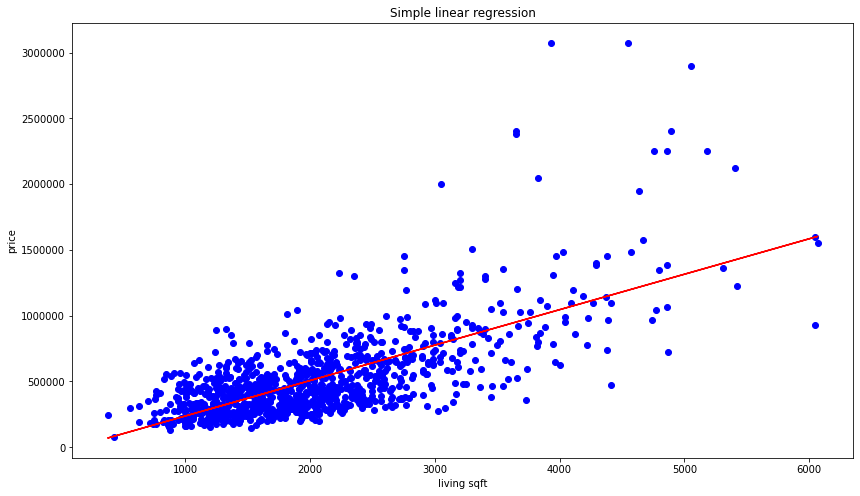

In [3]:
#b)

print(f"Coefficient of determination of the prediction [{model.score(X, y)}]")
print(f"Independent term in the linear model [{model.intercept_}]")
print(f"Regression coefficient y versus x (slope) [{model.coef_}]")

prediction = model.predict(X)
error = mean_squared_error(y, prediction)
print(f"Mean squared error equals: [{error}]")

plt.figure(figsize=(14, 8))
plt.ticklabel_format(axis="y", style='plain')
plt.xlabel('living sqft')
plt.ylabel('price')
plt.title('Simple linear regression')
plt.scatter(X, y, c='b')
plt.plot(X, prediction, c='r')

### Comment 
The linear regression model is not an efficient model for predicting house prices. We can see that the approximation is good at the beginning of the data, but at the end of the data the samples are very far away compared to the matched line.

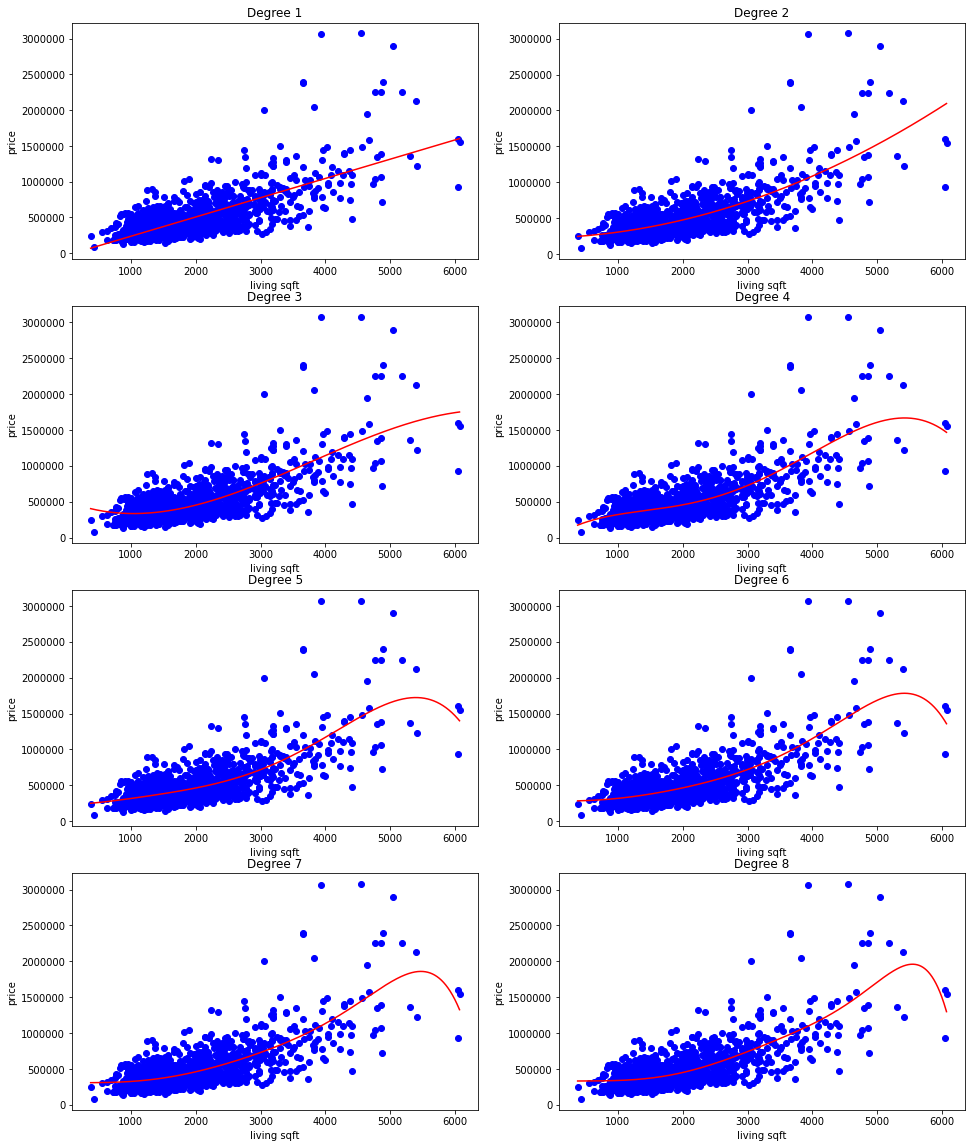

In [4]:
#c)
fig, axes = plt.subplots(4, 2, figsize=(16, 20))
x_axes = 0
X_new = np.arange(X.min(), X.max(), 1).reshape(-1,1)
errors = []

for order in range(1, 9):
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    model.fit(X_order, y)
    prediction = model.predict(poly.fit_transform(X_new))
    y_axes = (order + 1) % 2

    axes[x_axes][y_axes].ticklabel_format(axis="y", style='plain')
    axes[x_axes][y_axes].set_xlabel('living sqft')
    axes[x_axes][y_axes].set_ylabel('price')
    axes[x_axes][y_axes].set_title(f'Degree {order}')
    axes[x_axes][y_axes].scatter(X, y, c='b')
    axes[x_axes][y_axes].plot(X_new, prediction, c='r')
    
    x_axes = x_axes + 1 if (order + 1) % 2 else x_axes
    error = mean_squared_error(y, model.predict(X_order))
    errors.append(error)

### Comment
We use polynomial linear regression in cases when we see that the dependence of a function is not linear. Our data is not of that nature. We observe that as the degree of the polynomial increases, the curve fits better and better to our data.

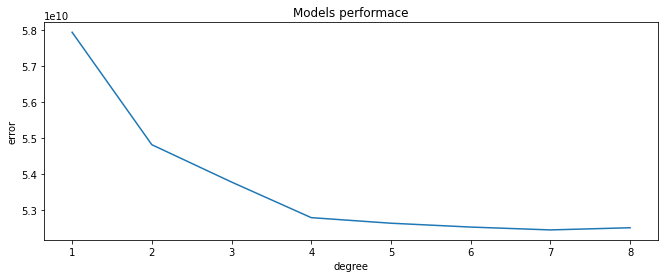

In [5]:
#Your code:

plt.figure(figsize=(11, 4))
plt.xlabel('degree')
plt.ylabel('error')
plt.title('Models performace')
plt.plot([x for x in range(1, 9)], errors)

### Comment
How can we observe the error between the values predicted by the model and the real values, in our case it significantly decreases with polynomials of degree 1-4. Then the decline is slower. At the end, we also see an increase in error, which is caused by the characteristics of high-degree polynomials, which try to match as many points as possible, so that their characteristics are not smooth.

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

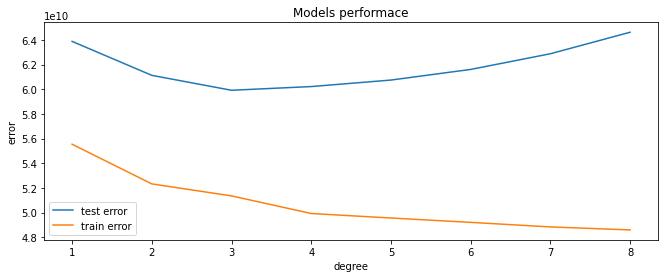

In [6]:
#a)

test_errors = []
train_errors = []

for order in range(1,9):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)
    
    poly = PolynomialFeatures(order, include_bias = False)
    X_order_train = poly.fit_transform(X_train)
    X_order_test = poly.fit_transform(X_test)
    model.fit(X_order_train, y_train)
    error = mean_squared_error(y_train, model.predict(X_order_train))
    train_errors.append(error)
    error = mean_squared_error(y_test, model.predict(X_order_test))
    test_errors.append(error)
    
    
plt.figure(figsize=(11, 4))
plt.xlabel('degree')
plt.ylabel('error')
plt.title('Models performace')
plt.plot([x for x in range(1, 9)], test_errors, label='test error')
plt.plot([x for x in range(1, 9)], train_errors, label='train error')
plt.legend()

### Comment
As expected, the error of the data we trained on is smaller than the error of the test data. The justification is simple, the training data is the data on which the model learned (it even matched this data). 

We can also see this effect of what I mentioned in task 1. With the increase of the polynomial, maybe the error in the training data decreases, but for test data this error only to some degree decreases, then it increases. Ultimately, it is even greater than the error for linear regression. 

The smallest error in the test data was for the polynomial of order 3, we can interpret it in such a way that then the model smoothly fitted the data and therefore also matched the test data. With the "ripple fit" of grade 8, the test data was far from what was expected.

## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

Coefficient of determination of the prediction [0.49670880166311404]
Mean squared error equals: [396407.1889615157]


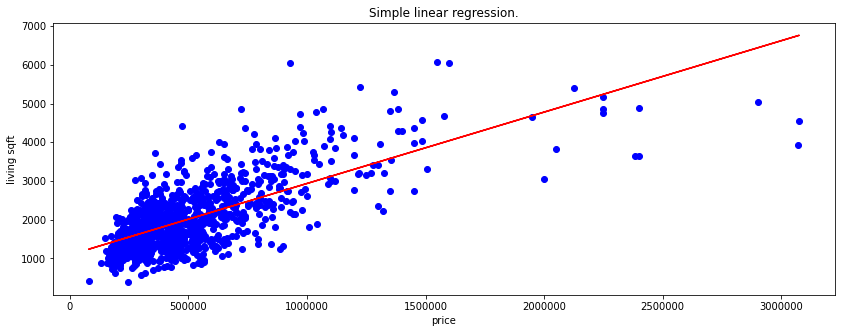

In [7]:
#a)

X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

model.fit(X, y)

print(f"Coefficient of determination of the prediction [{model.score(X, y)}]")

prediction = model.predict(X)
error = mean_squared_error(y, prediction)
print(f"Mean squared error equals: [{error}]")


plt.figure(figsize=(14, 5))
plt.ticklabel_format(axis="x", style='plain')
plt.xlabel('price')
plt.ylabel('living sqft')
plt.title('Simple linear regression.')
plt.scatter(X, y, c='b')
plt.plot(X, prediction, c='r')

### Comment
Finding a linear fit for an living sqft to the given price gives a few times smaller error than the price to the living sqft. The data in this approach is more linear and better for this type of regression.

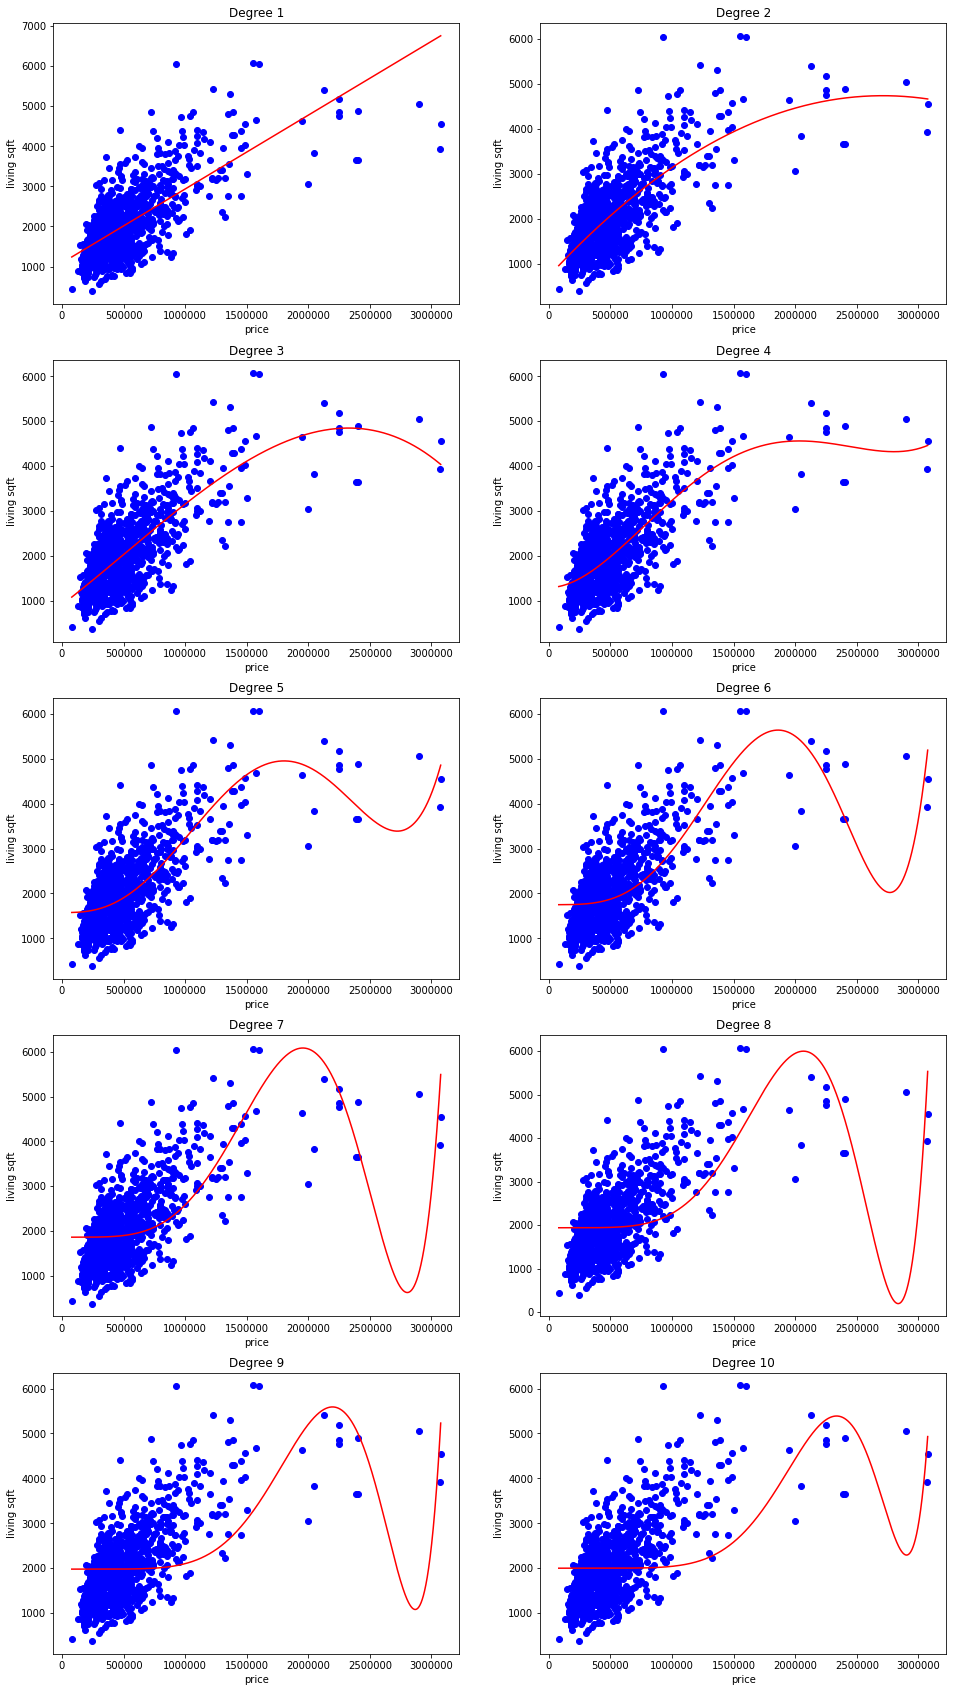

In [8]:
fig, axes = plt.subplots(5, 2, figsize=(16, 30))
x_axes = 0
X_new = np.arange(X.min(), X.max(), 1).reshape(-1,1)

for order in range(1, 11):
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    model.fit(X_order, y)
    prediction = model.predict(poly.fit_transform(X_new))
    y_axes = (order + 1) % 2

    axes[x_axes][y_axes].ticklabel_format(axis="x", style='plain')
    axes[x_axes][y_axes].set_xlabel('price')
    axes[x_axes][y_axes].set_ylabel('living sqft')
    axes[x_axes][y_axes].set_title(f'Degree {order}')
    axes[x_axes][y_axes].scatter(X, y, c='b')
    axes[x_axes][y_axes].plot(X_new, prediction, c='r')
    
    x_axes = x_axes + 1 if (order + 1) % 2 else x_axes

### Comment
In addition, seeing the shape of the data on the plot from the previous subsection, I decided to train the model and calculate predictions for polynomial regression. As I suspected, we can visually observe that for degree 2 and 3 we have a better fit than for degree 1 polynomials.

However, I began to notice a strange anomaly. As the degree of the polynomial increases, theoretically we should get a better fit (to the training data), but in this case the prediction graph started to look like it didn't fit our data.

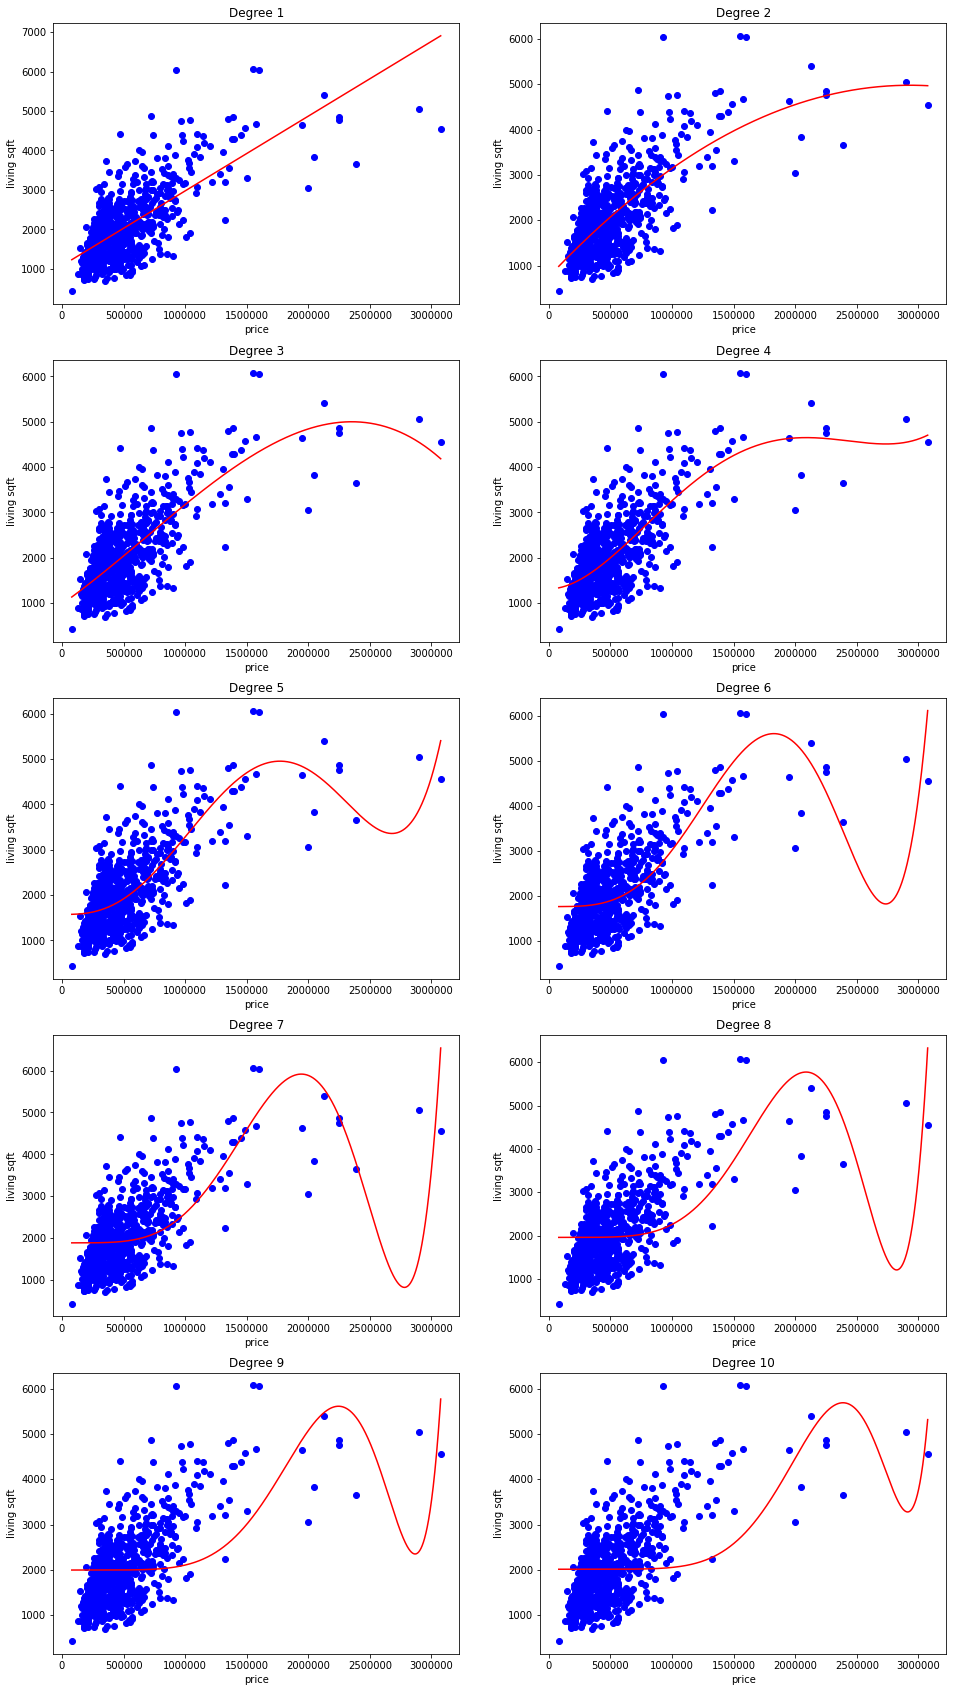

In [9]:
fig, axes = plt.subplots(5, 2, figsize=(16, 30))
x_axes = 0
X_new = np.arange(X.min(), X.max(), 1).reshape(-1,1)

test_errors = []
train_errors = []

for order in range(1, 11):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)
    
    poly = PolynomialFeatures(order, include_bias = False)
    X_order_train = poly.fit_transform(X_train)
    X_order_test = poly.fit_transform(X_test)
    model.fit(X_order_train, y_train)
    error = mean_squared_error(y_train, model.predict(X_order_train))
    train_errors.append(error)
    error = mean_squared_error(y_test, model.predict(X_order_test))
    test_errors.append(error)
    
    prediction = model.predict(poly.fit_transform(X_new))
    y_axes = (order + 1) % 2

    axes[x_axes][y_axes].ticklabel_format(axis="x", style='plain')
    axes[x_axes][y_axes].set_xlabel('price')
    axes[x_axes][y_axes].set_ylabel('living sqft')
    axes[x_axes][y_axes].set_title(f'Degree {order}')
    axes[x_axes][y_axes].scatter(X_train, y_train, c='b')
    axes[x_axes][y_axes].plot(X_new, prediction, c='r')
    
    x_axes = x_axes + 1 if (order + 1) % 2 else x_axes


### Comment
Looking for reasons, I decided to divide our data into test data and training data and create graphs on which I marked only the training points and the model result. The effect was still the same. With higher degree polynomials, a mismatch in the data is evident, especially in the range up to one million.

In addition, I did not notice that overfitting started to occur, even though with such a degree of polynomial our model should adjust to the largest possible number of points.

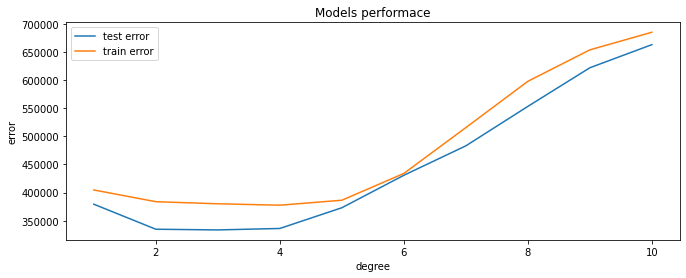

In [10]:
plt.figure(figsize=(11, 4))
plt.xlabel('degree')
plt.ylabel('error')
plt.title('Models performace')
plt.plot([x for x in range(1, 11)], test_errors, label='test error')
plt.plot([x for x in range(1, 11)], train_errors, label='train error')
plt.legend()

### Comment
My earlier suspicions are confirmed again. The training error, which theoretically should decrease with increasing polynomial degree, does not decrease but increases.

Looking for an answer to where such an anomaly came from, I came across a page with a discussion of a similar problem. The person working on that library there suggested that the problem might be the data, more specifically that the data have some points sharing the same x-coordinate.

This is more theoretical problem: "duplicated abcisses make the matrix for the least square problem singular and thus causes some solver to be unable to provide a solution". 

In [11]:
df = house_df[['price', 'sqft_living']].sort_values(['price', 'sqft_living'])
print(f"Before removing duplications [{len(df)}]")
df.drop_duplicates()
print(f"After removing duplications [{len(df)}]")
print(f"Number of unique prices [{len(pd.unique(df.price))}]")

Before removing duplications [21613]
After removing duplications [21613]
Number of unique prices [4028]


### Comment
I checked if we actually have different ys for one x value. For the whole dataset we don't have any duplicate rows, but we have 5 times less unique x than there are rows. We can conclude from this that for many of them there are y that do not satisfy the relation $f(x) = y_1 \wedge f(x) = y_2 \Rightarrow y_1 = y_2$.

C:\Users\SG0316762\.conda\envs\michal_conda\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.34809e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


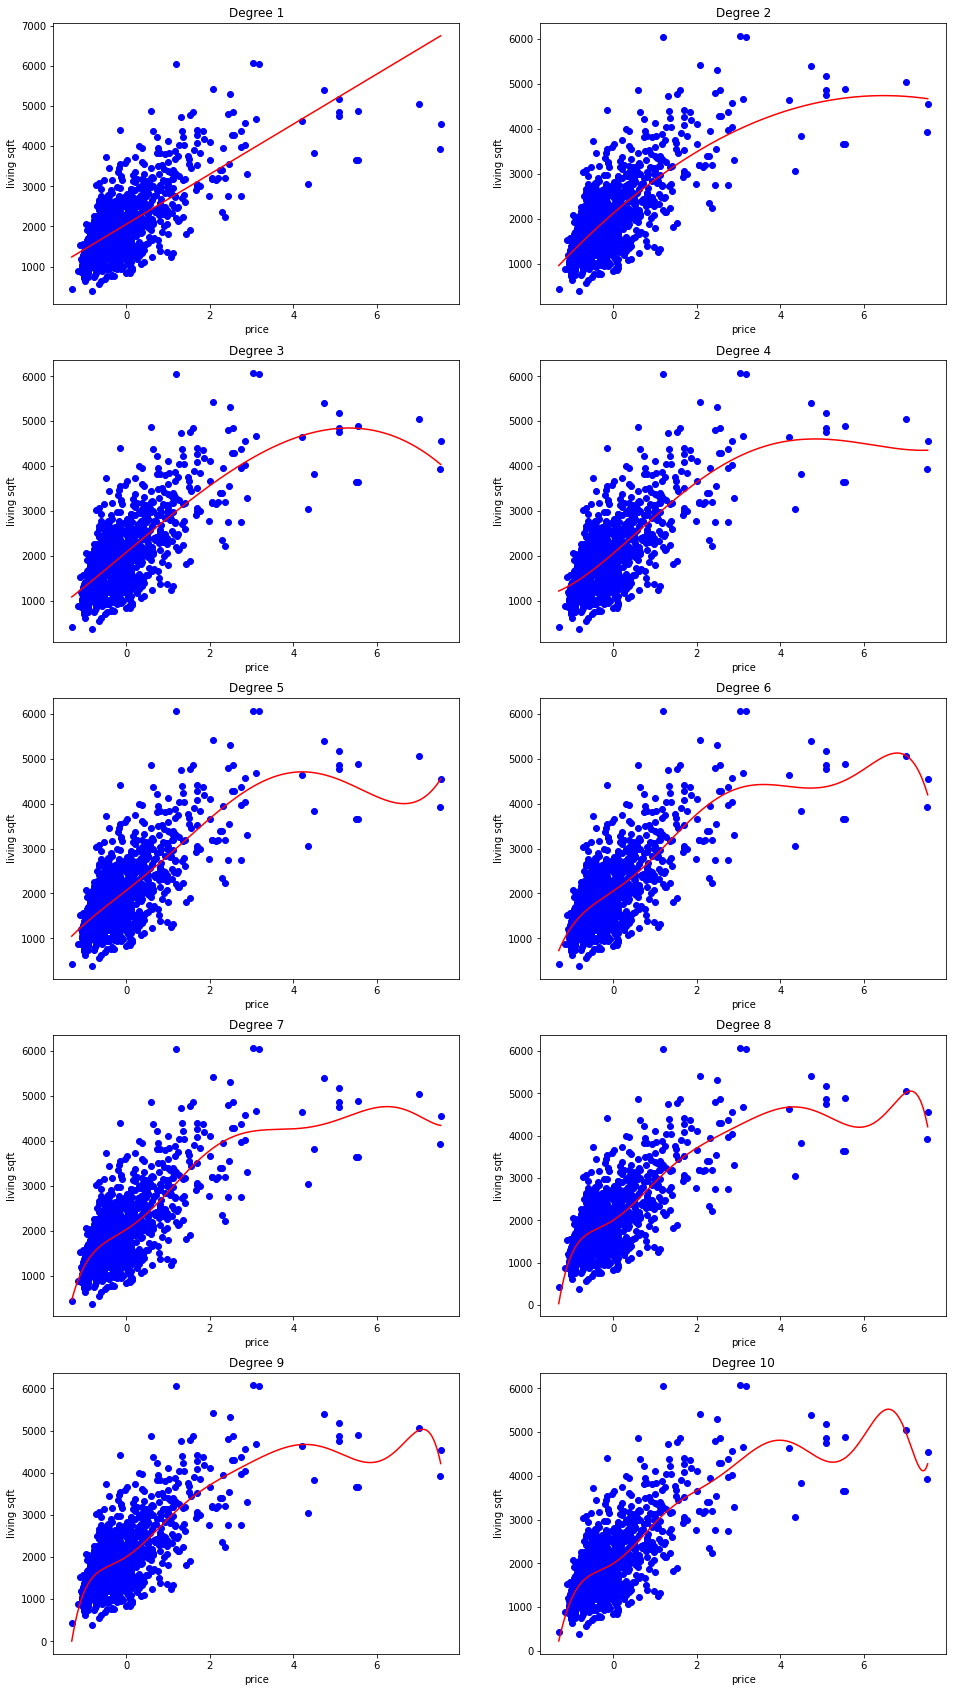

In [12]:
fig, axes = plt.subplots(5, 2, figsize=(16, 30))
x_axes = 0
X_new = np.arange(X.min(), X.max(), 1).reshape(-1,1)

from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

model = Ridge()
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_new = scaler.transform(X_new)

for order in range(1, 11):
    
    poly = PolynomialFeatures(order, include_bias = False)
    poly.fit(X_scaled)
    X_model = poly.transform(X_scaled)
    X_new_model = poly.transform(X_new)
        
    model.fit(X_model, y)
    prediction = model.predict(X_new_model)
    y_axes = (order + 1) % 2

    axes[x_axes][y_axes].ticklabel_format(axis="x", style='plain')
    axes[x_axes][y_axes].set_xlabel('price')
    axes[x_axes][y_axes].set_ylabel('living sqft')
    axes[x_axes][y_axes].set_title(f'Degree {order}')
    axes[x_axes][y_axes].scatter(X_scaled, y, c='b')
    axes[x_axes][y_axes].plot(X_new, prediction, c='r')
    
    x_axes = x_axes + 1 if (order + 1) % 2 else x_axes

### Comment
I used another regression model - Ridge. We can see in the graph above that the fit is starting to look better.

C:\Users\SG0316762\.conda\envs\michal_conda\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.67097e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


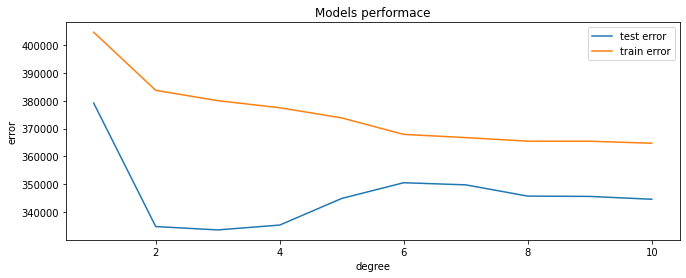

In [13]:
test_errors = []
train_errors = []

for order in range(1, 11):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)
    
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    poly = PolynomialFeatures(order, include_bias = False)
    poly.fit(X_train_scaled)
    X_train_model = poly.transform(X_train_scaled)
    X_test_model = poly.transform(X_test_scaled)
    
    model.fit(X_train_model, y_train)
    error = mean_squared_error(y_train, model.predict(X_train_model))
    train_errors.append(error)
    error = mean_squared_error(y_test, model.predict(X_test_model))
    test_errors.append(error)
        
plt.figure(figsize=(11, 4))
plt.xlabel('degree')
plt.ylabel('error')
plt.title('Models performace')
plt.plot([x for x in range(1, 11)], test_errors, label='test error')
plt.plot([x for x in range(1, 11)], train_errors, label='train error')
plt.legend()

### Comment
For our data, after using a different model, the training error started to decrease. This is not a very significant decrease, but it is due to the characteristics of the data, because in order to get better matches here, it would probably be necessary to clean the data from these "duplicates" somehow selecting the best rows.

We also see that the testing error is smaller than the training error, the reason for this is how the division into test and training data was made, and of course our data characteristics. Using a random split each time these results will change.

In [14]:
# b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


#Your model:
X = house_df[['zipcode', 'lat', 'sqft_living', 'view', 'grade', 'condition', 'sqft_lot']].values.reshape(-1, 7)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)    
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

Mean squared error equals: 48749943492.267586
Mean squared error equals: 34564934751.28766


### Comment
The fit model I found is 30% better than the proposed one. The reason for this may be the adoption of matching data about the location of the house at the beginning, which for many people is also one of the most important selection criteria. Interesting is while adding longitude, the error increases significantly, so we do not have a relationship between the price and the longitude.